#### 1. Import the required packages :

In [56]:
import pyodbc
import numpy as np
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.use('TkAgg')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13632\1867836165.py:8: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('TkAgg')


#### 2. Import the Data

##### Connect the SQL Server to get the data

In [10]:
# Eshtablishing the connection :

conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=DESKTOP-DDTGTVD\SQLEXPRESS02;'
    r'DATABASE=BANK_DB;'
    r'Trusted_Connection=yes;'
)

In [12]:
# If connection is succesfull, print True
if conn:
    print('True')

True


In [14]:
df1 = "SELECT * FROM Internal_Data "
df2 = "SELECT * FROM External_CIBIL_Data"

In [16]:
df1 = pd.read_sql(df1, conn)
df2 = pd.read_sql(df2, conn)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13632\346327068.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(df1, conn)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13632\346327068.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(df2, conn)


In [18]:
df1.head(2)

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,14769.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,6.0
1,14770.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,24.0


In [20]:
df2.head(2)

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,708.0,72.0,4.0,4.0,1.0,17.0,17.0,1.0,1.0,0.0,...,0.667,0.316,0.286,2.852,1.0,0.0,CC,CC,670.0,P2
1,709.0,72.0,33.0,20.0,11.0,631.0,268.0,0.0,0.0,0.0,...,0.000,0.000,0.000,0.633,0.0,0.0,ConsumerLoan,others,676.0,P2


#### 3. Analysis and Visualization

##### 1. Distribution of Education Level

In [34]:
Education_Level = pd.DataFrame(df2.groupby('EDUCATION').PROSPECTID.sum().sort_values(ascending = False))
Education_Level

,PROSPECTID
EDUCATION,
GRADUATE,427993500.0
12TH,368751518.0
SSC,239152000.0
UNDER GRADUATE,140611578.0
OTHERS,76507077.0
POST-GRADUATE,57317738.0
PROFESSIONAL,7384705.0


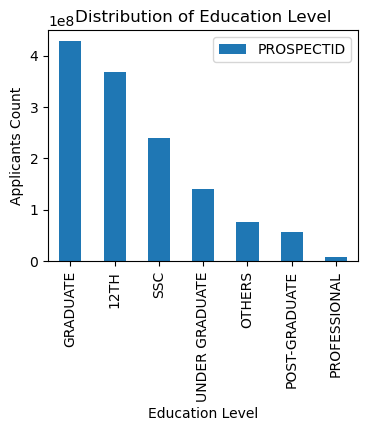

In [62]:
%matplotlib inline
Education_Level.plot(kind='bar', figsize=(4, 3))
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Applicants Count')
plt.show()

##### 2. Distribution of Gender

In [65]:
Gender_Distribution = pd.DataFrame(df2.groupby('GENDER').PROSPECTID.sum().sort_values(ascending = False))
Gender_Distribution

,PROSPECTID
GENDER,
M,1.160571e+09
F,1.571473e+08


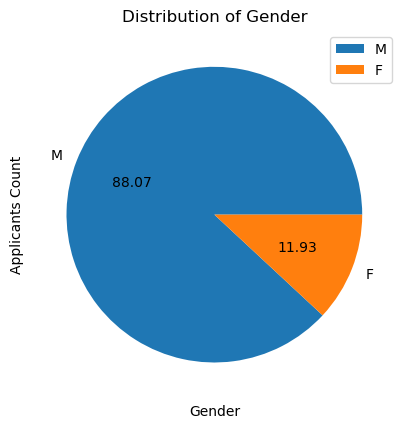

In [67]:
Gender_Distribution.plot(kind = 'pie' , subplots=True, autopct = '%.2f')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Applicants Count')
plt.show()

##### 3. Distribution of Maritalstatus

In [72]:
MaritalStatus = pd.DataFrame(df2.groupby('MARITALSTATUS').PROSPECTID.sum().sort_values(ascending = False))
MaritalStatus

,PROSPECTID
MARITALSTATUS,
Married,970891569.0
Single,346826547.0


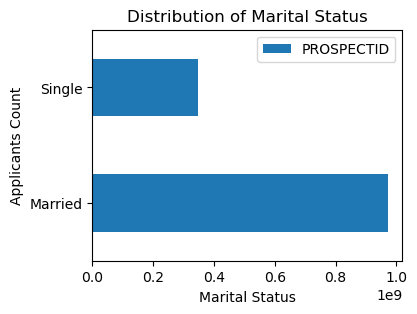

In [74]:
MaritalStatus.plot(kind='barh', figsize=(4, 3))
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Applicants Count')
plt.show()

##### 4. Distribution of Loan Type

In [77]:
Loan_Type = pd.DataFrame(df2.groupby('first_prod_enq2').PROSPECTID.sum().sort_values(ascending = False))
Loan_Type

,PROSPECTID
first_prod_enq2,
others,724605250.0
ConsumerLoan,301831641.0
PL,125622952.0
AL,73754225.0
CC,55575604.0
HL,36328444.0


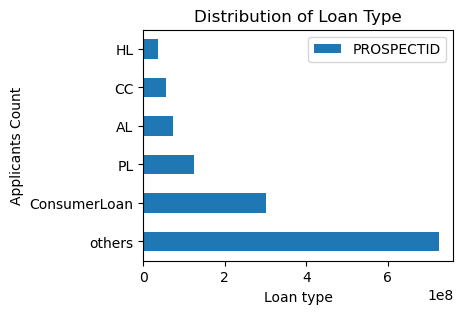

In [79]:
Loan_Type.plot(kind='barh', figsize=(4, 3))
plt.title('Distribution of Loan Type')
plt.xlabel('Loan type')
plt.ylabel('Applicants Count')
plt.show()

##### 5. Top 5 Income of Applicants

In [88]:
Applicants_Income = df2.groupby('NETMONTHLYINCOME')['PROSPECTID'].count().sort_values(ascending=False).head(6)
Applicants_Income

NETMONTHLYINCOME
25000.0    4904
20000.0    4880
30000.0    3940
15000.0    3669
18000.0    2966
35000.0    2386
Name: PROSPECTID, dtype: int64

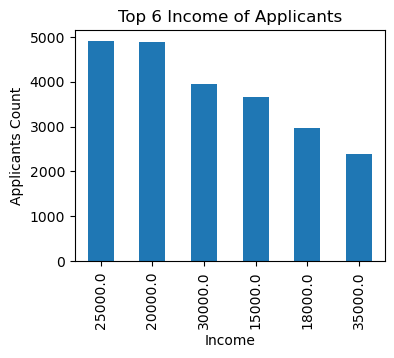

In [90]:
Applicants_Income.plot(kind='bar', figsize=(4, 3))
plt.title('Top 6 Income of Applicants')
plt.xlabel('Income')
plt.ylabel('Applicants Count')
plt.show()

##### 6. Top 10 Credit Score

In [97]:
Credit_Score = df2.groupby('Credit_Score')['PROSPECTID'].count().sort_values(ascending=False).head(10)
Credit_Score

Credit_Score
682.0    1357
678.0    1340
679.0    1330
680.0    1321
677.0    1259
681.0    1228
683.0    1224
673.0    1211
672.0    1203
674.0    1189
Name: PROSPECTID, dtype: int64

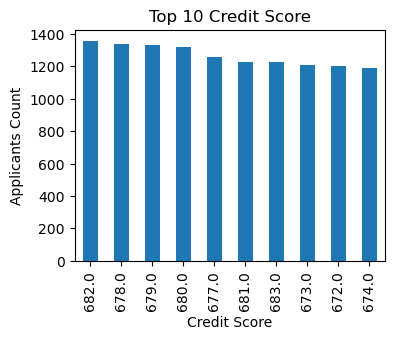

In [101]:
Credit_Score.plot(kind='bar', figsize=(4, 3))
plt.title('Top 10 Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Applicants Count')
plt.show()

##### 7. Distribution of Risk Category

In [104]:

# Create the Risk_Category column using conditions
df1['Risk_Category'] = df1['Tot_Missed_Pmnt'].apply(
    lambda x: 'High Risk' if x > 5 else 'Medium Risk' if 2 <= x <= 5 else 'Low Risk'
)

# Sort by Risk_Category
Risk_Category = df1.sort_values(by='Risk_Category')

# Display the result
Risk_Category.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Risk_Category
40794,40795.0,55.0,34.0,21.0,10.0,11.0,0.182,0.200,0.382,0.618,...,21.0,20.0,1.0,0.0,27.0,28.0,4.0,195.0,3.0,High Risk
11896,16793.0,100.0,91.0,9.0,11.0,6.0,0.110,0.060,0.090,0.910,...,0.0,96.0,0.0,1.0,97.0,3.0,3.0,134.0,2.0,High Risk
4379,4092.0,22.0,9.0,13.0,0.0,0.0,0.000,0.000,0.591,0.409,...,6.0,1.0,1.0,0.0,12.0,10.0,12.0,133.0,10.0,High Risk
18489,14458.0,16.0,7.0,9.0,2.0,2.0,0.125,0.125,0.562,0.438,...,4.0,0.0,0.0,0.0,0.0,16.0,11.0,38.0,4.0,High Risk
18852,18853.0,89.0,77.0,12.0,3.0,1.0,0.034,0.011,0.135,0.865,...,0.0,70.0,0.0,0.0,82.0,7.0,19.0,172.0,2.0,High Risk


In [112]:
Risk_Category = pd.DataFrame(df1.groupby('Risk_Category').PROSPECTID.sum().sort_values(ascending=False))
Risk_Category

,PROSPECTID
Risk_Category,
Low Risk,1.168760e+09
Medium Risk,1.409162e+08
High Risk,8.042053e+06


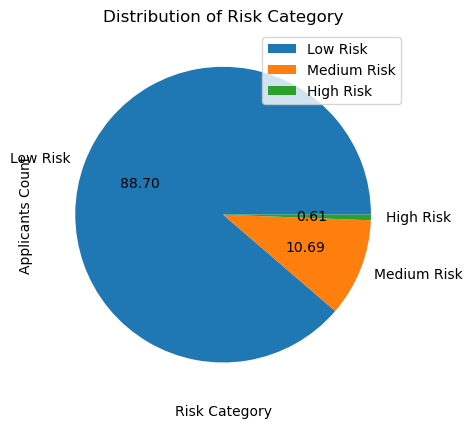

In [114]:
Risk_Category.plot(kind = 'pie' , subplots=True, autopct = '%.2f')
plt.title('Distribution of Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Applicants Count')
plt.show()

##### 8. Distribution of Credit Score by Segmentation

In [117]:

def categorize_credit_score(score):
    if score < 580:
        return 'Poor (<580)'
    elif 580 <= score <= 669:
        return 'Fair (580-669)'
    elif 670 <= score <= 739:
        return 'Good (670-739)'
    elif 740 <= score <= 799:
        return 'Very Good (740-799)'
    else:
        return 'Excellent (800+)'

# Create the Credit_Score_Category column
df2['Credit_Score_Category'] = df2['Credit_Score'].apply(categorize_credit_score)

  Credit_Score_Category  Customer_Count  Percentage
0        Good (670-739)           37278       72.62
1        Fair (580-669)           13635       26.56
2   Very Good (740-799)             372        0.72
3           Poor (<580)              45        0.09
4      Excellent (800+)               6        0.01


In [123]:
Credit_Score_Category = pd.DataFrame(df2.groupby('Credit_Score_Category').PROSPECTID.sum().sort_values(ascending = False))
Credit_Score_Category

,PROSPECTID
Credit_Score_Category,
Good (670-739),956022901.0
Fair (580-669),351202022.0
Very Good (740-799),8998748.0
Poor (<580),1310321.0
Excellent (800+),184124.0


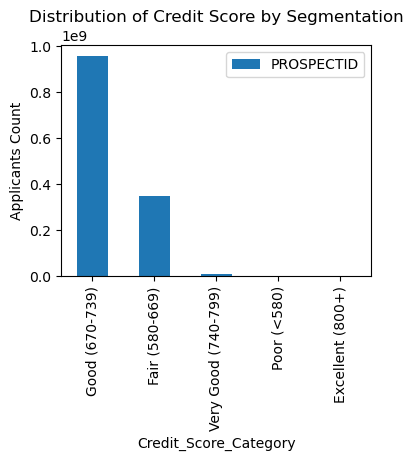

In [125]:
Credit_Score_Category.plot(kind='bar', figsize=(4, 3))
plt.title('Distribution of Credit Score by Segmentation')
plt.xlabel('Credit_Score_Category')
plt.ylabel('Applicants Count')
plt.show()

##### 9. Distribution of y column(Approved Flag)

In [133]:
Approved_Flag = pd.DataFrame(df2.groupby('Approved_Flag').PROSPECTID.sum().sort_values(ascending = False))
Approved_Flag

,PROSPECTID
Approved_Flag,
P2,826881751.0
P3,188147632.0
P1,151691760.0
P4,150996973.0


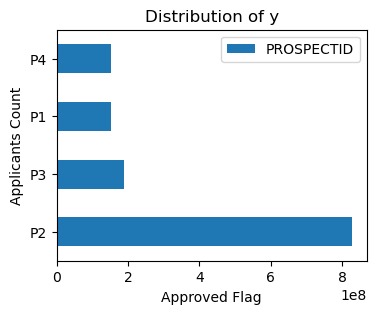

In [135]:
Approved_Flag.plot(kind='barh', figsize=(4, 3))
plt.title('Distribution of y')
plt.xlabel('Approved Flag')
plt.ylabel('Applicants Count')
plt.show()

##### 10. Identify Applicants with a high percentage of missed payments

In [167]:
Missed_Payments = ( df1[df1['Tot_Missed_Pmnt'] != 0] .groupby('Tot_Missed_Pmnt')['PROSPECTID'] .count() .sort_values(ascending=False) .to_frame()).head(5)
 
Missed_Payments.head(5)

,PROSPECTID
Tot_Missed_Pmnt,
1.0,11390
2.0,3484
3.0,1319
4.0,488
5.0,243


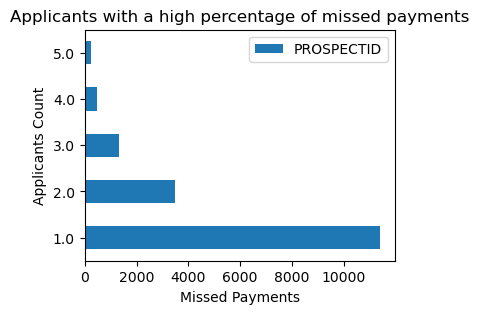

In [169]:
Missed_Payments.plot(kind='barh', figsize=(4, 3))
plt.title('Applicants with a high percentage of missed payments')
plt.xlabel('Missed Payments')
plt.ylabel('Applicants Count')
plt.show()

##### 11. Applicants who opened multiple new accounts in the last 6 months

In [163]:
new_Multiple_Accounts = pd.DataFrame( df1.groupby('Total_TL_opened_L6M')['PROSPECTID'] .count() .sort_values(ascending=False)).head(6)
new_Multiple_Accounts

,PROSPECTID
Total_TL_opened_L6M,
0.0,30574
1.0,12517
2.0,4272
3.0,1959
4.0,877
5.0,490


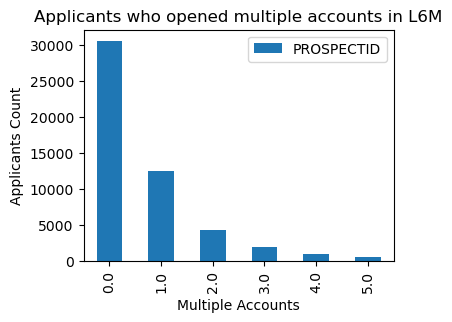

In [165]:
new_Multiple_Accounts.plot(kind='bar', figsize=(4, 3))
plt.title('Applicants who opened multiple accounts in L6M')
plt.xlabel('Multiple Accounts')
plt.ylabel('Applicants Count')
plt.show()

##### 12. Applicants who Closed multiple accounts in last 6 months

In [175]:
Closed_Multiple_Accounts = pd.DataFrame( df1.groupby('Tot_TL_closed_L6M')['PROSPECTID'] .count() .sort_values(ascending=False)).head(6)
Closed_Multiple_Accounts

,PROSPECTID
Tot_TL_closed_L6M,
0.0,38021
1.0,8895
2.0,2490
3.0,918
4.0,459
5.0,245


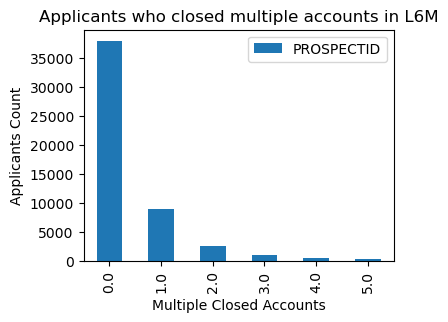

In [177]:
Closed_Multiple_Accounts.plot(kind='bar', figsize=(4, 3))
plt.title('Applicants who closed multiple accounts in L6M')
plt.xlabel('Multiple Closed Accounts')
plt.ylabel('Applicants Count')
plt.show()